Dataset: https://www.kaggle.com/datasets/pushpakhinglaspure/used-car-price-prediction 

Este conjunto de dados possui dados distribuídos em 9 colunas da seguinte forma:
<ul>
<li>Car_Name: Modelo ou nome do carro</li>
<li>Year: ano de fabricação do carro</li>
<li>Selling_Price: variável-alvo; preço atual pelo qual o carro foi vendido</li>
<li>Present_Price: preço atual pelo qual o carro está listado</li>
<li>Kms_Driven: quilometragem do carro</li>
<li>Fuel_Type: tipo de combustível. Gasolina, Diesel, híbrido, elétrico</li>
<li>Seller_Type: indica se o vendedor é particular ou um negociador</li>
<li>Transmission: tipo de trasmissão (manual, automático)</li>
<li>Owner: indica se o carro teve proprietário anterior ou está sendo vendido pelo primeiro proprietário.</li>
</ul>

Objetivo: Fazer previsões com os 2 melhores algoritmos de regressão e compará-las através de gráfico.

<hr style='height:0.5em'>

Importando as bibliotecas comuns ao projeto

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

### 1. Análise Exploratória dos Dados

Adicionando o conjunto de dados ao projeto e exibindo os 5 primeiros registros

In [2]:
used_car = pd.read_csv('cardekho_data.csv')
used_car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Informações sobre o dataset

In [3]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Há alguns atributos que são do tipo object. Para poder usar a Regressão tem que transformar em variável contínua/quantitativa

Transformar atributo 'Car_Name' com LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
used_car['Car_Name'] = label_encoder.fit_transform(used_car['Car_Name'])

used_car.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,93,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


Transformar atributos 'Fuel_Type', 'Seller_type' e 'Transmission' usando o método map()do pandas

In [5]:
# verificar categorias
print(used_car.Fuel_Type.unique())
print(used_car.Seller_Type.unique())
print(used_car.Transmission.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [6]:
used_car.Fuel_Type = used_car['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
used_car.Seller_Type = used_car['Seller_Type'].map({'Dealer': 0, 'Individual': 1})
used_car.Transmission = used_car['Transmission'].map({'Manual': 0, 'Automatic': 1})

used_car.head(3)        

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,0,0,0,0
1,93,2013,4.75,9.54,43000,1,0,0,0
2,68,2017,7.25,9.85,6900,0,0,0,0


Tipo de dados:

In [11]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int32  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 20.1 KB


Verificar se há dados nulos/ausentes (NaN)

In [7]:
used_car.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Resumo Estatístico:

In [10]:
used_car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']].describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


Correlação:

c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


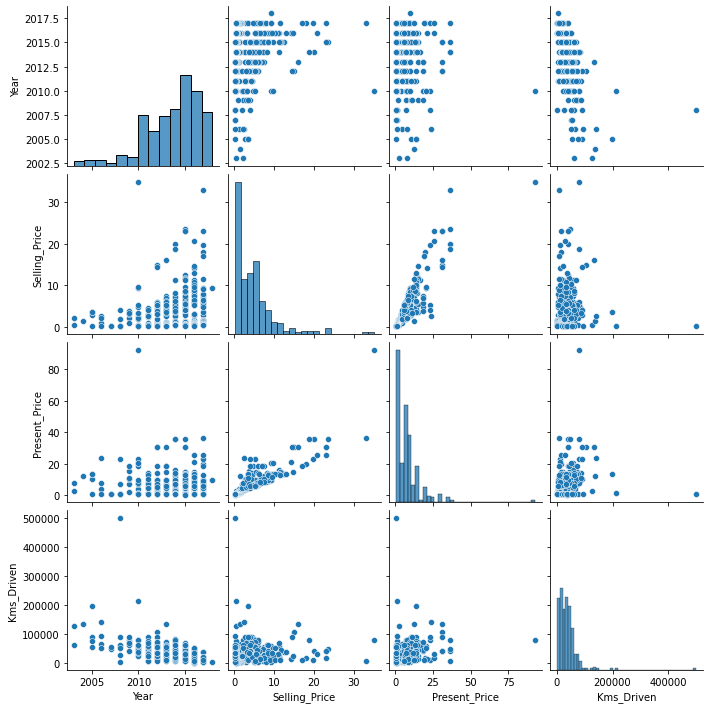

In [15]:
sns.pairplot(used_car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']])

### 2. REGRESSÃO MÚLTIPLA

In [16]:
from sklearn.linear_model import LinearRegression

Escolher as variáveis preditoras e a variável alvo 

In [17]:
preditoras = used_car.drop('Selling_Price', axis=1)
alvo = used_car['Selling_Price']

In [18]:
preditoras.shape, alvo.shape

((301, 8), (301,))

Separação em dados de treino e teste

In [19]:
X_train, X_test, y_train, y_test = train_test_split(preditoras, alvo, test_size=0.3, random_state=5)

Criar e treinar o modelo

In [20]:
multipla = LinearRegression()
multipla.fit(X_train, y_train)

LinearRegression()

Verificar o coeficiente de determinação de treino e de teste

In [22]:
print(f'Coeficiente de Determinação de Treino: {multipla.score(X_train, y_train):.4f}')
print(f'Coeficiente de Determinação de Teste: {multipla.score(X_test, y_test):.4f}')

Coeficiente de Determinação de Treino: 0.8827
Coeficiente de Determinação de Teste: 0.8355


Um Coeficiente de Determinação de Treino de 0.8827 sugere que o modelo é capaz de explicar aproximadamente 88.27% da variabilidade dos dados usados para treinar o modelo.

Um Coeficiente de Determinação de Teste de 0.8355 sugere que o modelo é capaz de explicar aproximadamente 83.55% da variabilidade dos dados de teste, que são dados não vistos pelo modelo durante o treinamento.

Previsões:

In [24]:
mult_pred = multipla.predict(X_test)

Métrica: Erro Médio Absoluto (Mean Absolute Error)

Em termos simples, o MAE quantifica o quão longe, em média, as previsões do modelo estão dos valores reais. Um MAE mais baixo indica um desempenho melhor do modelo

In [25]:
mean_absolute_error(y_test, mult_pred)

1.211921743059644

VALIDAÇÃO CRUZADA

In [33]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
modelo = LinearRegression()
resultado = cross_val_score(modelo, preditoras, alvo, cv=kfold)
resultado

array([0.86565228, 0.83189698, 0.90759806, 0.84057797, 0.64920793])

In [34]:
print(f'Coeficiente de Determinação Médio: {resultado.mean()* 100:.2f}%')

Coeficiente de Determinação Médio: 81.90%


<hr style='height:0.5em'>

### 3. RANDOM FOREST REGRESSOR

In [28]:
from sklearn.ensemble import RandomForestRegressor

Criar e treinar o modelo:

In [35]:
rnd = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=5)
rnd.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=5)

In [36]:
print(f'Coeficiente de Determinação de Treino: {rnd.score(X_train, y_train):.4f}')
print(f'Coeficiente de Determinação de Teste: {rnd.score(X_test, y_test):.4f}')

Coeficiente de Determinação de Treino: 0.9761
Coeficiente de Determinação de Teste: 0.9718


In [37]:
# Previsões
rnd_prev = rnd.predict(X_test)

In [38]:
# Erro Médio Absoluto
mean_absolute_error(y_test, rnd_prev)

0.5195351056649946

VALIDAÇÃO CRUZADA:

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
modelo = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=5)
resultado = cross_val_score(modelo, preditoras, alvo, cv=kfold)
resultado

array([0.96609536, 0.88639244, 0.97280137, 0.92028205, 0.61311056])

In [40]:
print(f'Coeficiente de Determinação Médio: {resultado.mean()* 100:.2f}%')

Coeficiente de Determinação Médio: 87.17%


<hr style='height:0.5em'>

### 4. XGBoost

In [41]:
from xgboost import XGBRegressor

In [49]:
xg = XGBRegressor(n_estimators = 100, learning_rate = 0.05, random_state=5)
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=5, ...)

In [50]:
print(f'Coeficiente de Determinação de Treino: {xg.score(X_train, y_train):.4f}')
print(f'Coeficiente de Determinação de Teste: {xg.score(X_test, y_test):.4f}')

Coeficiente de Determinação de Treino: 0.9982
Coeficiente de Determinação de Teste: 0.9596


In [51]:
# Previsões
xg_prev = xg.predict(X_test)

In [52]:
mean_absolute_error(y_test, xg_prev)

0.5444915427545924

VALIDAÇÃO CRUZADA:

In [53]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
modelo = XGBRegressor(n_estimators = 100, learning_rate = 0.05, random_state=5)
resultado = cross_val_score(modelo,preditoras,alvo,cv=kfold)
resultado

array([0.96127774, 0.93653995, 0.97981652, 0.93473067, 0.78999277])

In [54]:
print(f'Coeficiente de Determinação Médio: {resultado.mean()* 100:.2f}%')

Coeficiente de Determinação Médio: 92.05%


<hr style="height:0.5em">

### 5. LightBoost

In [55]:
from lightgbm import LGBMRegressor

In [78]:
light = LGBMRegressor(num_leaves=5, max_depth=10, learning_rate=0.5, n_estimators=200, force_row_wise=True, random_state=5)
light.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 7
[LightGBM] [Info] Start training from score 4.609571


LGBMRegressor(force_row_wise=True, learning_rate=0.5, max_depth=10,
              n_estimators=200, num_leaves=5, random_state=5)

In [79]:
print(f'Coeficiente de Determinação de Treino: {light.score(X_train, y_train):.4f}')
print(f'Coeficiente de Determinação de Teste: {light.score(X_test, y_test):.4f}')

Coeficiente de Determinação de Treino: 0.9913
Coeficiente de Determinação de Teste: 0.8363


In [80]:
# Previsões
light_prev = light.predict(X_test)

In [81]:
mean_absolute_error(y_test, light_prev)

0.9725366907871711

VALIDAÇÃO CRUZADA:

In [82]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
modelo = LGBMRegressor(num_leaves=5, max_depth=10, learning_rate=0.5, n_estimators=200, force_row_wise=True, random_state=5)
resultado = cross_val_score(modelo,preditoras,alvo,cv=kfold)
resultado

[LightGBM] [Info] Total Bins 198
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 7
[LightGBM] [Info] Start training from score 4.574375
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 7
[LightGBM] [Info] Start training from score 4.584191
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 7
[LightGBM] [Info] Start training from score 4.718465
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 7
[LightGBM] [Info] Start training from score 4.687801
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 241, number of used features: 7
[LightGBM] [Info] Start training from score 4.741286


array([0.84525855, 0.93248736, 0.95565441, 0.92372922, 0.4828182 ])

In [83]:
print(f'Coeficiente de Determinação Médio: {resultado.mean()* 100:.2f}%')

Coeficiente de Determinação Médio: 82.80%


### RESULTADOS E CONCLUSÃO: 

Regressão Múltipla:
* Coeficiente de Determinação de Treino: 0.8827
* Coeficiente de Determinação de Teste: 0.8355
* Erro Médio Absoluto: 1.211921743059644
* Coeficiente de Determinação Médio: 81.90%

Random Forest:

* Coeficiente de Determinação de Treino: 0.9761
* Coeficiente de Determinação de Teste: 0.9718
* Erro Médio Absoluto: 0.5195
* Coeficiente de Determinação Médio: 87.17%

XGBoost:

* Coeficiente de Determinação de Treino: 0.9982
* Coeficiente de Determinação de Teste: 0.9596
* Erro Médio Absoluto: 0.5445
* Coeficiente de Determinação Médio: 92.05%

LightGBM:

* Coeficiente de Determinação de Treino: 0.9913
* Coeficiente de Determinação de Teste: 0.8363
* Erro Médio Absoluto: 0.9725
* Coeficiente de Determinação Médio: 82.80%


Com base nesses resultados, os algoritmos XGBoost e Random Forest parecem ser os dois melhores em relação ao desempenho global


### 6. PREVISÕES

1. RANDOM FOREST

In [84]:
# inputs: 90, 2008, 28000, 0, 0, 1, 1, 3.45
Car_Name = int(input('Informe o modelo do carro: '))
Year = int(input('Informe o ano do carro: '))
Kms_Driven = int(input('Informe a quilometragem: '))
Fuel_Type = int(input('Informe o tipo do combustível: '))
Seller_Type = int(input('Informe o tipo do vendedor: '))
Transmission = int(input('Informe o tipo da Transmissão: '))
Owner = int(input('Informe se é proprietário único ou não: '))
Present_Price = float(input('Informe o preço atual: '))

In [85]:
novos_dados = [Car_Name, Year, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Present_Price]
price_predict = rnd.predict([novos_dados])
print("O preço do carro é: US$ {:.2f}".format(price_predict[0]))

O preço do carro é: US$ 30.53


c:\Users\marce\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


2. XGBOOST

In [86]:
novos_dados = [Car_Name, Year, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Present_Price]
price_predict = xg.predict([novos_dados])
print("O preço do carro é: US$ {:.2f}".format(price_predict[0]))

O preço do carro é: US$ 33.09


Comparando valores reais e previstos

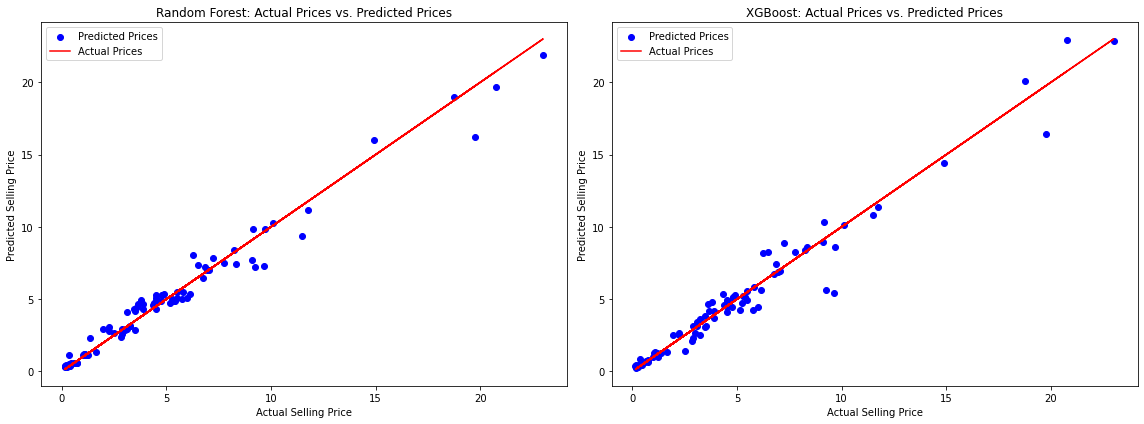

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1 - Random Forest Predictions vs Actual Prices
axs[0].scatter(y_test, rnd_prev, color='blue', label='Predicted Prices')
axs[0].plot(y_test, y_test, color='red', label='Actual Prices')
axs[0].set_title('Random Forest: Actual Prices vs. Predicted Prices')
axs[0].set_xlabel('Actual Selling Price')
axs[0].set_ylabel('Predicted Selling Price')
axs[0].legend()

# Gráfico 2 - XGBoost Predictions vs Actual Prices
axs[1].scatter(y_test, xg_prev, color='blue', label='Predicted Prices')
axs[1].plot(y_test, y_test, color='red', label='Actual Prices')
axs[1].set_title('XGBoost: Actual Prices vs. Predicted Prices')
axs[1].set_xlabel('Actual Selling Price')
axs[1].set_ylabel('Predicted Selling Price')
axs[1].legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()